<a href="https://colab.research.google.com/github/Hanuphant/Introductory_Deep_Learning_Classifier/blob/main/Intro_DL_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introductory Deep Learning Image Classifier

#### Unzip the MEDNIST Data

In [ ]:
# !unzip /content/drive/MyDrive/Q4_dataset.zip

#### Imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as om
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
import os

#### Loading the data

In [ ]:
classType = os.listdir("/content/MedNIST_dataset")
classType

['CXR', 'Hand', 'HeadCT', 'BreastMRI', 'AbdomenCT', 'ChestCT']

In [ ]:
imageList = list()
imageClass = list()
step=0
for folder in classType:
  step += 1
  files = [f for f in os.listdir(os.path.join("/content/MedNIST_dataset", folder))]
  random_images_path = np.random.choice(files, 1000)
  for image_path in random_images_path:
    imageList.append(os.path.join("/content/MedNIST_dataset",folder,image_path))
    imageClass.append(step)

#### Random Plots to Visualize the data

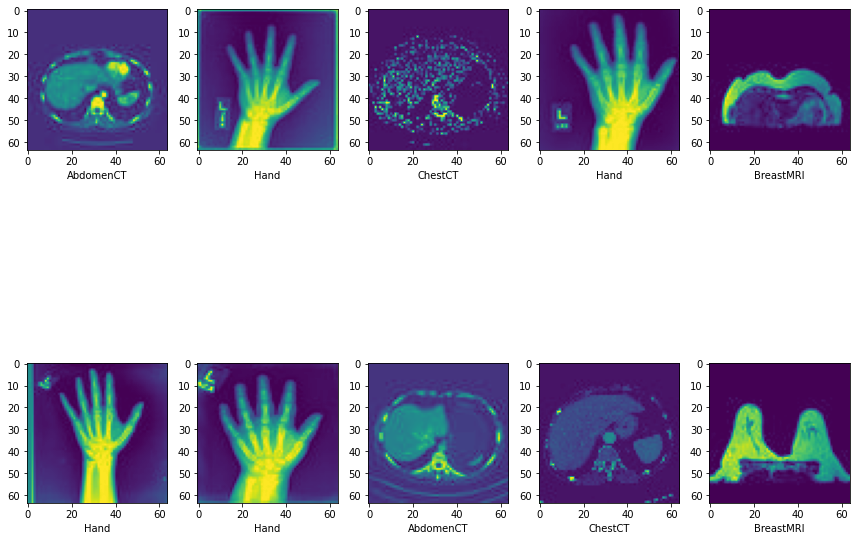

In [ ]:
from numpy.core.fromnumeric import size
plt.subplots(2,5, figsize = (12, 12))
for i, k in enumerate(np.random.randint(len(imageList), size = 10)):
  im = Image.open(imageList[k])                      #      plot and label them
  arr = np.array(im)
  plt.subplot(2,5,i+1)
  plt.xlabel(classType[imageClass[k]-1])
  plt.imshow(im)
plt.tight_layout()
plt.show()

In [ ]:
toTensor = torchvision.transforms.ToTensor()
def scale(img):
  imgtensor = toTensor(img)
  imgtensor = (imgtensor - imgtensor.min())/(imgtensor.max() - imgtensor.min() + 1e-10)
  return imgtensor

In [ ]:
imageTensor = torch.stack([scale(Image.open(impath)) for impath in imageList])
classTensor2 = torch.tensor(imageClass) - 1 


In [ ]:
classTensor2[0]
tensor = torch.zeros(classTensor2.shape[0], 6)
tensor.shape
for i in range(6000):
  tensor[i, classTensor2[i]] = 1
tensor[4378, :]
classTensor = tensor
classTensor.shape

torch.Size([6000, 6])

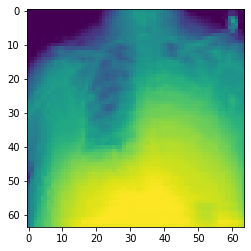

In [ ]:
sample = imageTensor[456]
sample = np.array(sample)
plt.imshow(sample[0])
plt.show()

#### Generating the training and testing dataset

In [ ]:
trainlist = list()
testlist = list()
for i in range(len(imageTensor)):
  rann = np.random.random()
  if rann < 0.7:
    trainlist.append(i)
  else:
    testlist.append(i)
trainid = torch.tensor(trainlist)
testid = torch.tensor(testlist)
trainX = imageTensor[trainid, :, :, :]
testX = imageTensor[testid, : ,:, :]
trainY = classTensor[trainid]
testY = classTensor[testid]

#### Model Definition

Model

In [ ]:
from torch.nn.modules.linear import Linear
from torch.nn.modules.pooling import MaxPool2d
from torch.nn.modules.activation import ReLU


class ImgNet(nn.Module):
  def __init__(self, input, output):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=128, kernel_size=(3,3), stride = (2,2))
    self.relu1 = ReLU()
    self.maxpool1 = MaxPool2d(kernel_size=(2,2), stride = (2, 2))
    self.conv2 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=(3,3), stride = (2,2))
    self.relu2 = ReLU()
    self.maxpool2 = MaxPool2d(kernel_size=(2,2), stride = (2, 2))
    self.fc1 = Linear(576, 64)
    self.fc2 = Linear(64, 16)
    self.fc3 = Linear(16, output)

  def forward(self, x):
    x = self.conv1(x)
    x = self.relu1(x)

    x = self.maxpool1(x)
    x = self.maxpool2(self.relu2(self.conv2(x)))
    
    x = self.relu1(self.fc1(torch.flatten(x, 1)))    
    x = self.relu2(self.fc2(x))
    # x = F.softmax(self.fc3(x))
    x = F.softmax(F.sigmoid(self.fc3(x)))
    return x

In [ ]:
model = ImgNet(input=(64,64), output=6)
print(model)

ImgNet(
  (conv1): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 64, kernel_size=(3, 3), stride=(2, 2))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=576, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=6, bias=True)
)


#### Training of model

Loss Function

In [ ]:
# Hyperparamters
epochs = 10   # Setting the number of epochs
learning_rate = 1e-2  # Setting the learning rata 
batch_size = 32 # Setting the batch_size

criterion = nn.CrossEntropyLoss() # Taking the mentioned CrossEntropyLoss
optimizer = om.Adam(model.parameters(), lr=learning_rate) # Using the Adam optimizer model

Training the model

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch =   0; Training loss = 232.8999
Epoch =   0; Testing loss = 102.1127
Epoch =   1; Training loss = 232.8202
Epoch =   1; Testing loss = 102.0641
Epoch =   2; Training loss = 232.6010
Epoch =   2; Testing loss = 101.8882
Epoch =   3; Training loss = 232.0426
Epoch =   3; Testing loss = 101.5587
Epoch =   4; Training loss = 231.1882
Epoch =   4; Testing loss = 101.1166
Epoch =   5; Training loss = 230.1566
Epoch =   5; Testing loss = 100.6176
Epoch =   6; Training loss = 229.0111
Epoch =   6; Testing loss = 100.1043
Epoch =   7; Training loss = 227.8672
Epoch =   7; Testing loss = 99.6034
Epoch =   8; Training loss = 226.7962
Epoch =   8; Testing loss = 99.1524
Epoch =   9; Training loss = 225.8588
Epoch =   9; Testing loss = 98.7764


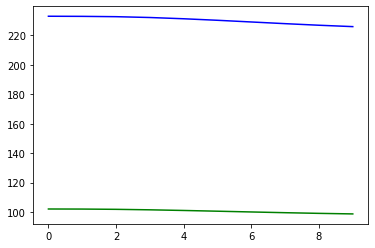

In [ ]:
finalepochloss = []
finaltestloss = []

for epoch in range(epochs):
  model.train() # Setting the model to training mode
  epochLoss = 0.  # Resetting the epoch loss
  testLoss = 0. # Resetting the testLoss
  permute = torch.randperm(len(trainlist))  # Random permutation of the training indexes
  trainX = trainX[permute, :, :, :] # Taking the slice
  trainY = trainY[permute]  # Taking the slice from the labels
  for batch in range(len(trainlist)//batch_size):
    optimizer.zero_grad() # Restting the optimizer gradients
    batch_inputtr = trainX[batch*batch_size:(batch+1)*batch_size, :, :, :]  # As the name suggests
    batch_labeltr = trainY[batch*batch_size:(batch+1)*batch_size] # As the name suggests
    yOut = model(batch_inputtr) # Parses the output from the model
    loss = criterion(yOut, batch_labeltr) # Calculates the loss from the output generated and the batch
    epochLoss += loss.item() 
    # print(epochLoss)
    loss.backward()
    optimizer.step()
  
  model.eval()
  for batch in range(len(testlist)//batch_size):
    with torch.no_grad(): # Stopping gradient descent to check for test loss
      # optimizer.zero_grad()
      batch_inputte = testX[batch*batch_size:(batch+1)*batch_size, :, :, :]  # As the name suggests
      batch_labelte = testY[batch*batch_size:(batch+1)*batch_size] # As the name suggests
      yOut1 = model(batch_inputte) # Parses the output from the model
      # print(yOut1)
      loss = criterion(yOut1, batch_labelte) # Calculates the loss from the output generated and the batch
      testLoss += loss.item()

  print("Epoch = {:-3}; Training loss = {:.4f}".format(epoch,epochLoss))
  print("Epoch = {:-3}; Testing loss = {:.4f}".format(epoch,testLoss))
  finalepochloss.append(epochLoss)
  finaltestloss.append(testLoss)

x = np.arange(epochs)
tr = np.array(finalepochloss) # For plotting training loss
te = np.array(finaltestloss)  # For plotting testing loss
plt.plot(x, tr, color = 'b')  # Plot train loss against epoch
plt.plot(x, te, color = 'g')  # Plot test loss against epoch
plt.show()
  # break


#### Model Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
outputs = model(testX)
_, predicted = torch.max(outputs, 1)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y_true = np.array(torch.argmax(testY,axis=1))
y_pred = np.array(predicted)

In [ ]:
confusion_matrix(y_true, y_pred)

array([[  0, 286,  14,   0,   0,   0],
       [  0, 151, 178,   0,   0,   0],
       [  0,   1, 285,   0,   0,  21],
       [  0,   0,  60, 166,   0,  81],
       [  0,   0, 172,  15,   0, 104],
       [  0,   0,   1,   0,   0, 290]])

In [ ]:
precision_score(y_true, y_pred, average=None)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.34474886, 0.40140845, 0.91712707, 0.        ,
       0.58467742])

In [ ]:
recall_score(y_true, y_pred, average=None)

array([0.        , 0.45896657, 0.92833876, 0.54071661, 0.        ,
       0.99656357])

In [ ]:
f1_score(y_true, y_pred, average=None)

array([0.        , 0.39374185, 0.56047198, 0.68032787, 0.        ,
       0.73697586])

Based on the confusion matrix results, recall score and F1 score, it seems the model is having a hard time classifying ChestCT scans. Due to the poor image quality of ChestCT the model predicted some of ChestCT scans with CXR and AbdomenCT.

